In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("dataset/La Liga.csv")
df2 = pd.read_csv("dataset/Bundesliga.csv")
df3 = pd.read_csv("dataset/Serie A.csv")
df4 = pd.read_csv("dataset/English Championship.csv")

In [4]:
df=df.append(df2, ignore_index=True)
df=df.append(df3, ignore_index=True)
df=df.append(df4, ignore_index=True)

In [5]:
df=df.drop(columns=["Clubs"])

In [6]:
df["Matches won"].replace("-", 0, inplace=True)
df["Matches lost"].replace("-", 0, inplace=True)
df["Matches drawn"].replace("-", 0, inplace=True)
df

,Matches played,Matches won,Matches drawn,Matches lost,Goals for,Goals against,Goal difference,Points
0,8,5,1,2,18,8,10,16
1,8,4,3,1,9,4,5,15
2,8,4,2,2,12,7,5,14
3,8,4,2,2,11,7,4,14
4,8,4,2,2,11,8,3,14
5,8,3,4,1,19,10,9,13
6,8,3,4,1,8,6,2,13
7,8,3,3,2,5,6,-1,12
8,8,3,2,3,12,11,1,11
9,8,2,4,2,13,12,1,10


In [7]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(bootstrap=False, max_depth=10, n_estimators=5)

In [35]:
reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [36]:
y_pred = reg.predict(X_test)

In [37]:
for a,b in zip(y_test, y_pred):
    print(a, b)

10 10.85
14 14.0
19 18.0
14 14.0
11 10.05
14 14.0
16 15.45
9 7.5
9 9.0
7 7.0
8 8.0
10 9.0
14 14.0
15 15.55
6 7.0
13 9.0
2 3.8


In [38]:
treez = reg.estimators_
treez

[DecisionTreeRegressor(criterion='mse', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1796602010, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=2067767065, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1054140707, splitter='best'),
 DecisionTreeRegressor(cr

In [39]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [40]:
for tree in treez:
    export_graphviz(tree, out_file=dot_data, max_depth=10,filled=True, rounded=True,special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [41]:
len(graph)

20

KeyboardInterrupt: 

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 12, in zmq.backend.cython.checkrc._check_rc
    PyErr_CheckSignals()
KeyboardInterrupt


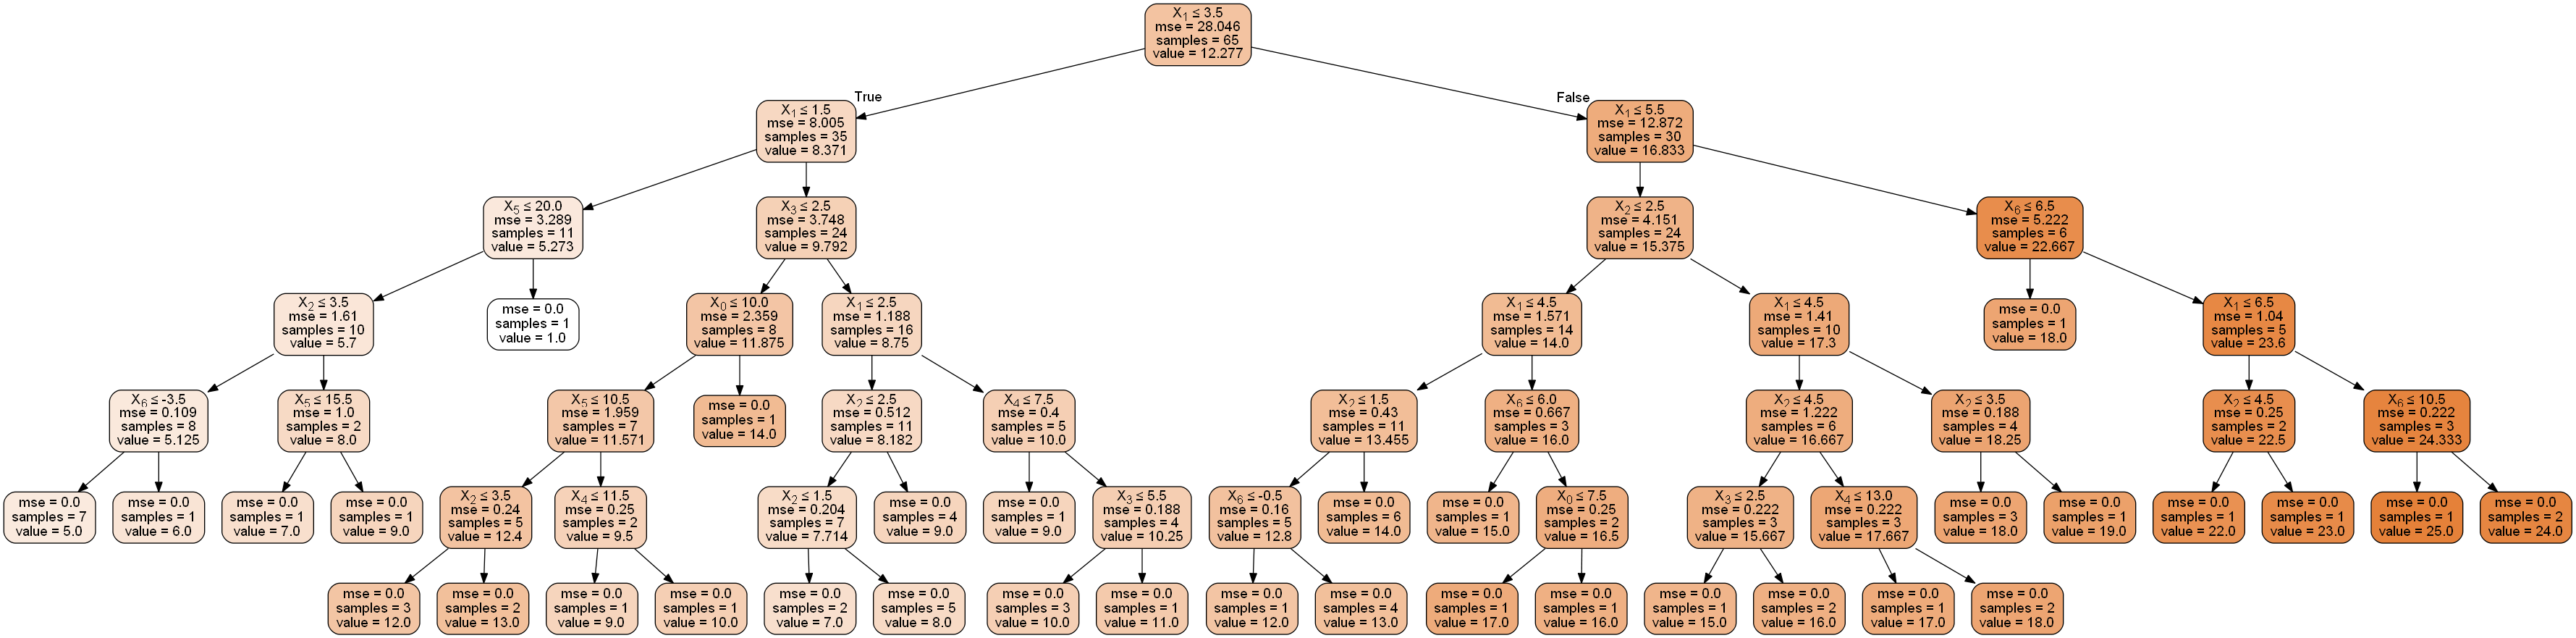

In [42]:
Image(graph[0].create_png())